In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('city_day.csv')
print(df.head())

        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
missing_values = df.isnull().sum()
df.fillna(df.mean(numeric_only=True), inplace=True)

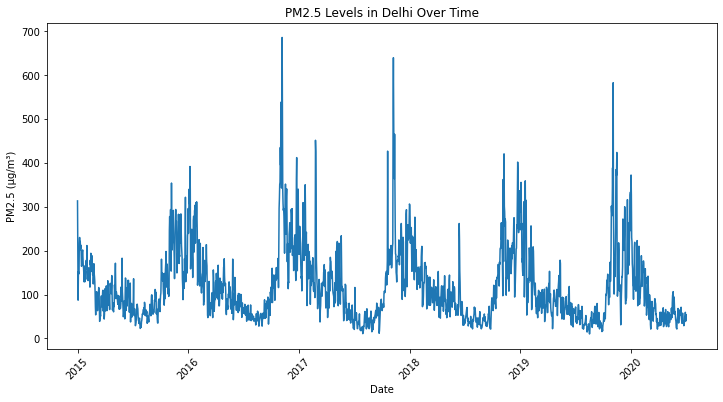

In [4]:
delhi_df = df[df['City'] == 'Delhi']

plt.figure(figsize=(12,6))
sns.lineplot(data=delhi_df, x='Date', y='PM2.5')
plt.title('PM2.5 Levels in Delhi Over Time')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.show()

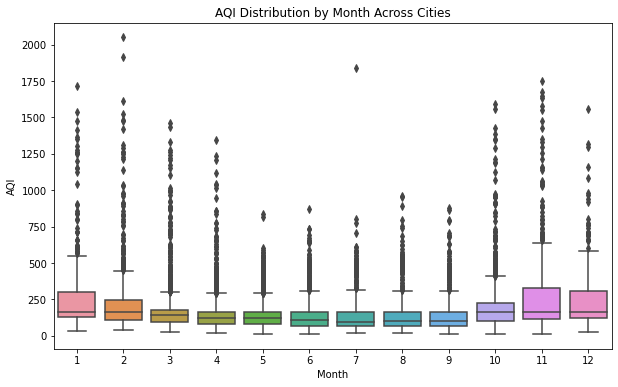

In [5]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

plt.figure(figsize=(10,6))
sns.boxplot(x='Month', y='AQI', data=df)
plt.title('AQI Distribution by Month Across Cities')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.show()

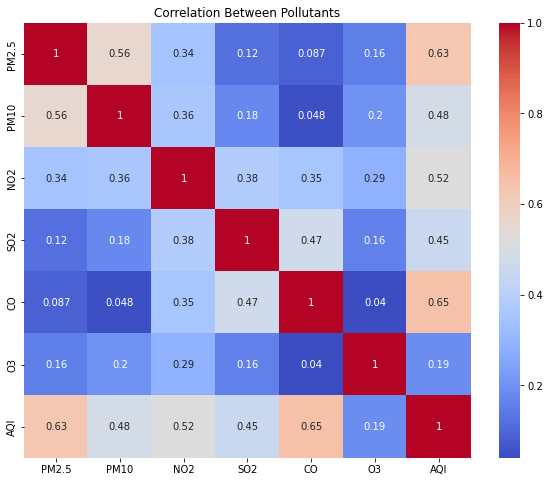

In [6]:
corr = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'AQI']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Pollutants')
plt.show()

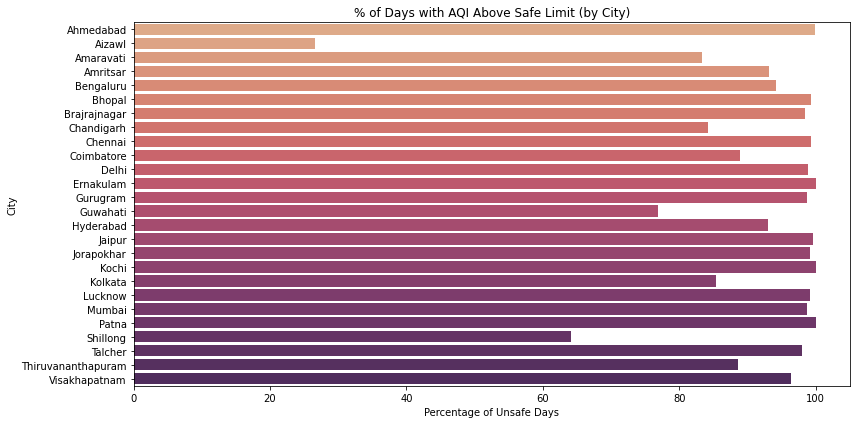

In [7]:
safe_limit = 50
df['Above_Safe'] = df['AQI'] > safe_limit

city_safety = df.groupby('City')['Above_Safe'].mean() * 100  # % of unsafe days

plt.figure(figsize=(12,6))
sns.barplot(x=city_safety.values, y=city_safety.index, palette='flare')
plt.title('% of Days with AQI Above Safe Limit (by City)')
plt.xlabel('Percentage of Unsafe Days')
plt.ylabel('City')
plt.tight_layout()
plt.show()